[![Notebook Tutorial](__code/__all/notebook_tutorial.png)](https://neutronimaging.ornl.gov/ct-reconstruction/)

<img src='__docs/notebook_rules.png' />

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
# %matplotlib notebook
# %matplotlib ipympl
%matplotlib inline

import imars3d
print(f"Using imarsd version {imars3d.__version__}")

from __code.imars3dui import Imars3dui
from __code.roi_selection_ui import Interface

from __code import system
system.System.select_working_dir()
from __code.__all import custom_style
custom_style.style()

Using imarsd version 1.1.4


** Using Debugging Mode! **


# Select input data 

In [2]:
from __code.imars3dui import DataType
import os

# TESTING
top_folder = "/Volumes/JeanHardDrive/HFIR/CG1D/IPTS-24863-test-imars3d-notebook/raw/"
raw_data = top_folder + "ct_scans/Feb04_2020_half_set"
assert os.path.exists(raw_data)
ob_data = top_folder + "/ob/Feb04_2020"
assert os.path.exists(ob_data)
dc_data = top_folder + "/dc/Feb06_2020"
assert os.path.exists(dc_data)


## raw data

In [3]:
o_imars3dui = Imars3dui(working_dir=system.System.get_working_dir())
# o_imars3dui.select_raw()

# debugging
o_imars3dui.current_data_type = DataType.raw
o_imars3dui.data_selected(raw_data)

raw folder selected: ['/Volumes/JeanHardDrive/HFIR/CG1D/IPTS-24863-test-imars3d-notebook/raw/ct_scans/Feb04_2020_half_set'] with 582 files)


## ob 

In [4]:
# o_imars3dui.select_ob()
o_imars3dui.current_data_type = DataType.ob
o_imars3dui.data_selected([ob_data])

ob folder selected: ['/Volumes/JeanHardDrive/HFIR/CG1D/IPTS-24863-test-imars3d-notebook/raw/ob/Feb04_2020'] with 10 files)


## dc 

In [5]:
# o_imars3dui.select_dc()
o_imars3dui.current_data_type = DataType.dc
o_imars3dui.data_selected([dc_data])

dc folder selected: ['/Volumes/JeanHardDrive/HFIR/CG1D/IPTS-24863-test-imars3d-notebook/raw/dc/Feb06_2020'] with 10 files)


# Load

ct:   0%|          | 0/582 [00:00<?, ?it/s]

ob:   0%|          | 0/10 [00:00<?, ?it/s]

dc:   0%|          | 0/10 [00:00<?, ?it/s]

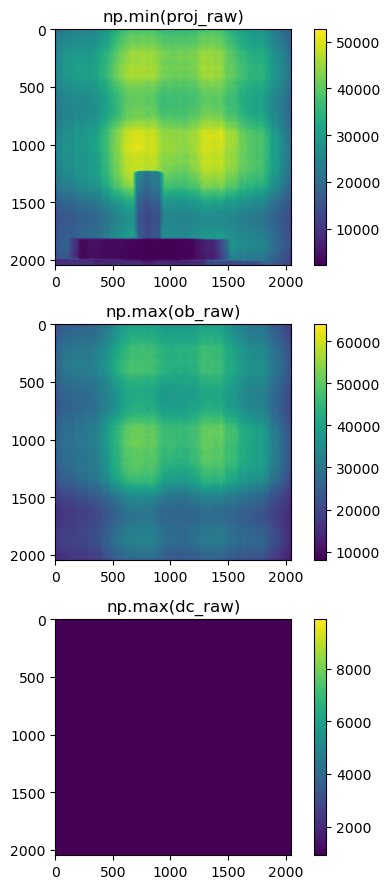

In [6]:
o_imars3dui.load_and_display_data()

# Crop

### select crop region

In [7]:
o_imars3dui.crop_embedded()

interactive(children=(IntSlider(value=0, description='left', max=2047), IntSlider(value=2047, continuous_updat…

### perform cropping 

In [8]:
o_imars3dui.perform_embedded_cropping()

Running crop ...
cropping done!


# Gamma filtering  (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

In [9]:
o_imars3dui.gamma_filtering_options()

Checkbox(value=False, description='Gamma filtering')

In [10]:
o_imars3dui.gamma_filtering()

Gamma filtering skipped!


# Normalization (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

Running normalization ...
normalization done in 8.97s


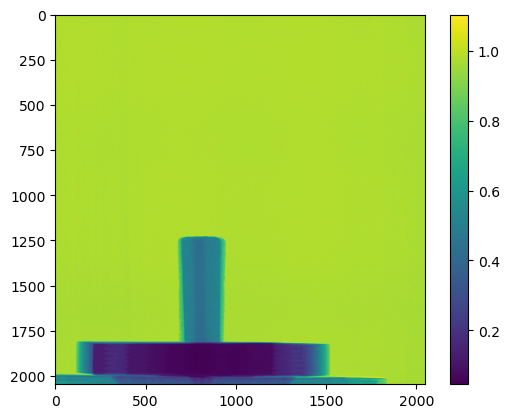

In [11]:
o_imars3dui.normalization_and_display()

# Beam fluctuation correction

### Select a region that does not contain the sample to improve the normalization

In [12]:
o_imars3dui.select_beam_fluctuation_roi_embedded()

interactive(children=(IntSlider(value=0, description='left', max=2046), IntSlider(value=2046, continuous_updat…

### perform beam fluctuation correction

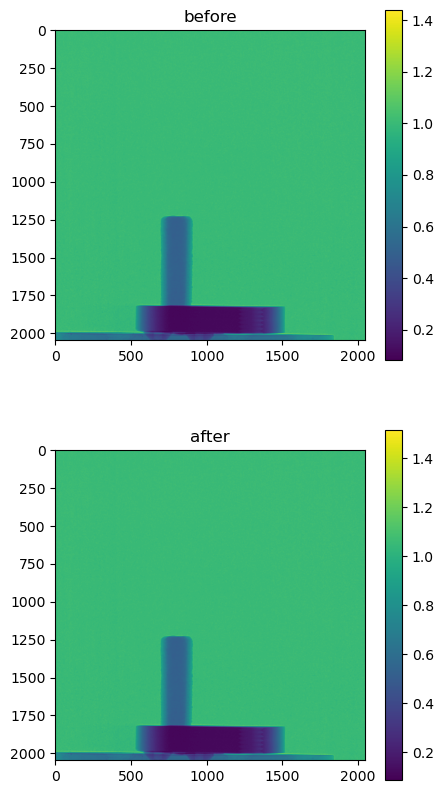

In [13]:
o_imars3dui.beam_fluctuation_correction_embedded()

# Transmission to attenuation

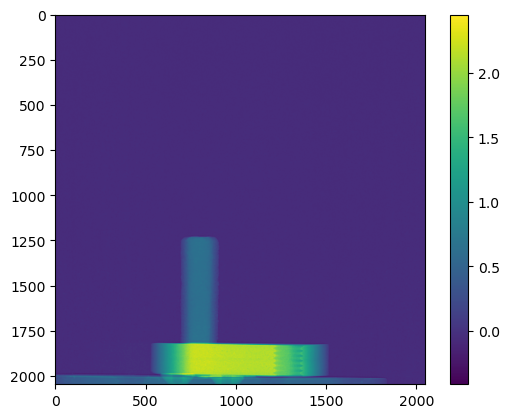

In [14]:
o_imars3dui.minus_log_and_display()

# Tilt correction (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

## find 0 and 180 degrees files

In [15]:
o_imars3dui.find_0_180_degrees_files()

## calculate tilt 

In [16]:
o_imars3dui.calculate_tilt()

## apply tilt correction

INFO:imars3d.backend.diagnostics.tilt:Executing Filter: Tilt correction
INFO:imars3d.backend.diagnostics.tilt:3D array detected, applying tilt correction with tilt = -0.560 deg


Applying tilt correction using -0.560 ...


Applying tilt corr:   0%|          | 0/582 [00:00<?, ?it/s]

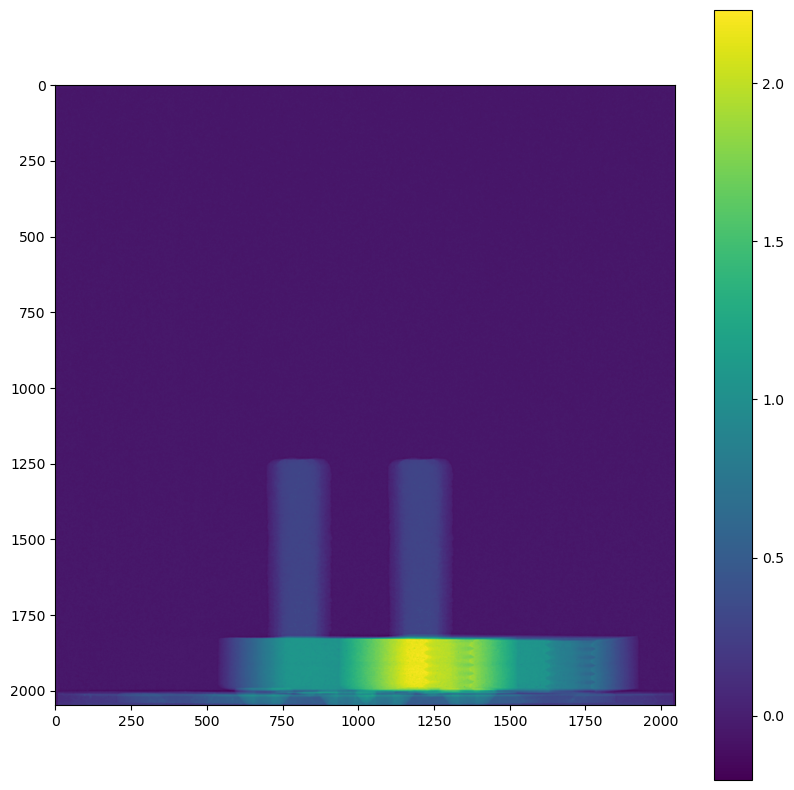

In [17]:
o_imars3dui.apply_tilt_and_display()

# Filtering

* strikes removal (Zzz) - using ketcham method on 3D stack
* remove negative values

In [18]:
o_imars3dui.filter_options()

Checkbox(value=False, description='Strikes removal')

Checkbox(value=False, description='Remove negative values')

In [19]:
o_imars3dui.apply_filter_options()

 Skipped strikes removal!
 Skipped remove negative values!


# Display sinogram 

In [20]:
o_imars3dui.display_sinogram()

interactive(children=(IntSlider(value=0, description='index', max=2047), Output()), _dom_classes=('widget-inte…

# Rotation center (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

In [21]:
o_imars3dui.rotation_center()

INFO:imars3d.backend.diagnostics.rotation:Executing Filter: Find Rotation Center
INFO:imars3d.backend.util.functions:Due to system load, setting maximum workers to 7
INFO:imars3d.backend.diagnostics.rotation:Using all pairs of angles


Running rotation center ...


Finding rotation center:   0%|          | 0/3 [00:00<?, ?it/s]

INFO:imars3d.backend.diagnostics.rotation:FINISHED Executing Filter: Find Rotation Center


rotation center found in 3.66s
 - value: (822.75,)


# Testing reconstruction on some slides

In [22]:
import algotom.rec.reconstruction as rec
import multiprocessing as mp
import numpy as np

from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

In [36]:
list_slices = [200, 800, 1500]
rec_images = []
for num, idx in enumerate(list_slices):
    rec_images.append(rec.gridrec_reconstruction(o_imars3dui.sinogram_mlog[idx],
                                         o_imars3dui.rot_center[0],
                                         angles=o_imars3dui.rot_angles,
                                         apply_log=False,
                                         ratio=1.0,
                                         filter_name='shepp',
                                         pad=100,
                                         ncore=mp.cpu_count()))
    
# display slices reconstructed here
def display_slices(slice_index):
    fig, axs = plt.subplots(num="testing reconstruction", ncols=2, nrows=1)
    fig.set_figwidth(15)
    
    axs[0].imshow(rec_images[slice_index])
    axs[0].set_title(f"Slice {list_slices[slice_index]}.")
    axs[1].imshow(o_imars3dui.overlap_image)
    axs[1].set_title(f"Integrated image and slice {list_slices[slice_index]} position.")

    axs[1].axhline(list_slices[slice_index], color='red', linestyle='-')
    
    
display_test = interactive(display_slices,
                          slice_index = widgets.IntSlider(min=0,
                                                 max=len(list_slices)-1,
                                                 continuous_update=True))
display(display_test)


interactive(children=(IntSlider(value=0, description='slice_index', max=2), Output()), _dom_classes=('widget-i…

# Reconstruction 

In [ ]:
o_imars3dui.reconstruction_and_display()

# Export


In [ ]:
o_imars3dui.export()